# Flight Price Prediction
- In this project i will do flight price prediction.The goal of this project is to identify the price b/w one city to another city or one country to another country.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Load Dataset

In [368]:
df=pd.read_csv("flight_price.csv")
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


# Data Preprocessing
- Data Sample
- Shape of Data
- Check Columns
- Null values
- Duplicates
- Statistical Summary

# Data Sample

In [369]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [370]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
836,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → HYD → COK,09:45,16:10,6h 25m,1 stop,No info,9646
1080,Jet Airways,21/06/2019,Banglore,Delhi,BLR → DEL,15:15,18:10,2h 55m,non-stop,In-flight meal not included,7229
1787,IndiGo,21/06/2019,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info,3943
7402,Air India,3/06/2019,Delhi,Cochin,DEL → JDH → BOM → COK,12:55,19:15 04 Jun,30h 20m,2 stops,No info,12436
9945,IndiGo,18/04/2019,Banglore,Delhi,BLR → DEL,20:00,22:50,2h 50m,non-stop,No info,4823


# Shape

In [371]:
df.shape

(10683, 11)

# Conclussion
- Data contain `10683` rows and `11` columns 

# Columns Info
- `Airline` Airline gives us the information about the airline.
- `Date_of_Journey` Date_of_Journey shows the date on which the customer can book a flight.
- `Source` Source shows the place where the customer can board the flight.
- `Destination` Destination shows the place where the customer's flight will land.
- `Route` Route shows information about different routes.
- `Dep_Time` Dep_Time shows the departure time of the flight.
- `Arrival_Time` Arrival_Time shows the arrival time of the flight.
- `Duration` Duration shows how much time the plane takes to reach the destination.
- `Total_Stops` Total_Stops shows how many stops are present from one place to another.
- `Additional_Info` Shows extra information about the Airline.
- `Price` Price shows the price of the flight Target Col.

# Null Values

In [372]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

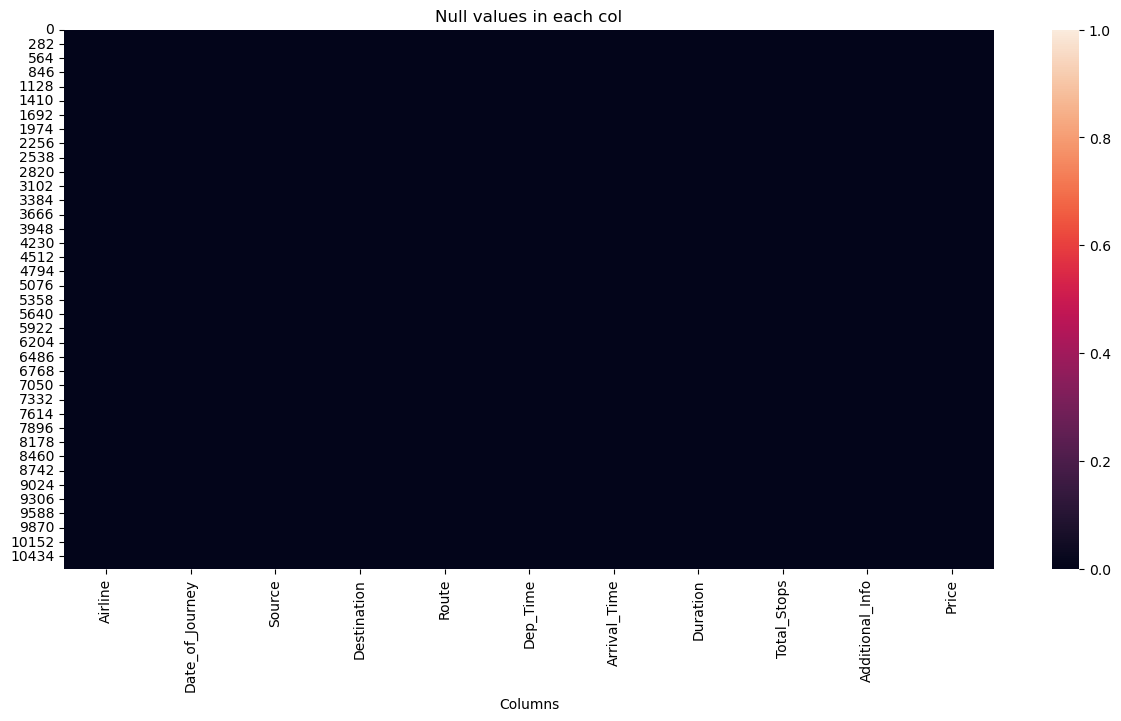

In [373]:
plt.figure(figsize=(15,7))
plt.title("Null values in each col")
sns.heatmap(df.isnull())
plt.xlabel("Columns")
plt.show()

# Conclussion
- we can see that there no large null values so we can simply drop the null values

In [374]:
df.dropna(inplace=True)

# Duplicates

In [375]:
df.duplicated().sum()

220

**There are `220` duplicates values check the duplicates**

In [376]:
df[df.duplicated()].sort_values(["Airline", "Date_of_Journey", "Source", "Destination"])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
8168,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
9913,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
5042,Air India,1/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164
6377,Air India,1/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164
...,...,...,...,...,...,...,...,...,...,...,...
9216,Jet Airways,9/06/2019,Delhi,Cochin,DEL → IDR → BOM → COK,05:30,04:25 10 Jun,22h 55m,2 stops,No info,13292
7502,SpiceJet,03/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No info,6860
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873


# Conclussion
- we can't drop duplicates values b/c there is no dupliacates.
- I mean price of each record has different so we can't treat this as a duplicates

# Datatypes

In [377]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Conclussion
- `Date_of_Journey` in object form convert this into datetime.
- `Dep_Time`   and    `Arrival_Time` also in object form convert this into datetime..
- we can also see that in `Arrival_Time` time some rows contain full date time and some rows contain only time.

In [378]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')

In [379]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [380]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


# Statistical Summary

In [381]:
df.describe()

,Date_of_Journey,Price
count,10682,10682.000000
mean,2019-05-04 19:56:32.398427392,9087.214567
min,2019-03-01 00:00:00,1759.000000
25%,2019-03-27 00:00:00,5277.000000
50%,2019-05-15 00:00:00,8372.000000
75%,2019-06-06 00:00:00,12373.000000
max,2019-06-27 00:00:00,79512.000000
std,NaN,4611.548810


In [382]:
df.describe(include='object')

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,5,6,128,222,1343,368,5,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,4536,4536,2376,233,423,550,5625,8344


# Unque Values

In [383]:
for i in df.describe(include='object').columns:
    # Columns
    print(f"Unique Values in {i}")
    
    # Show Unique Values
    print(df[i].unique())
    
    
    # Total Unique Values
    print(f"Total Unique values are:  {df[i].nunique()}")
    
    print("-*"*50)
    print()

Unique Values in Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Total Unique values are:  12
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Unique Values in Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Total Unique values are:  5
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Unique Values in Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total Unique values are:  6
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Unique Values in Route
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL 

# Check Overall Info

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


# Feature Engnering
- In Feature Engnering we can create new feature using existing features and drop unecessary feature.

# Convert Duration
- `Duration` Column contain the combination of `hour` and `min` now we can convert this into minute only.

In [385]:
def change_hour_to_min(col):
    hour=df[col].str.replace("h","").str.replace("m","").str.split().str.get(0).astype('int')
    minute=df[col].str.replace("h","").str.replace("m","").str.split().str.get(1).astype("float").fillna(0)
    
    return (hour*60)+minute

# Apply Fun

In [386]:
df["Duration_In_Min"]=change_hour_to_min("Duration")

In [387]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170.0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140.0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325.0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285.0


In [388]:
df[['Duration_In_Min','Duration']]

,Duration_In_Min,Duration
0,170.0,2h 50m
1,445.0,7h 25m
2,1140.0,19h
3,325.0,5h 25m
4,285.0,4h 45m
...,...,...
10678,150.0,2h 30m
10679,155.0,2h 35m
10680,180.0,3h
10681,160.0,2h 40m


# Clean `Total Stop` col
- We can get only interger value from `Total Stop` Col if interger value is not present replace with 0

In [389]:
df.sample(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Min
10311,Jet Airways,2019-03-06,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 07 Mar,21h 5m,1 stop,No info,14815,1265.0
10022,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 04 Jun,24h 45m,1 stop,No info,14714,1485.0


In [390]:
df['Total_Stops']=df['Total_Stops'].str.extract(r"(\d+)").fillna(0).astype(int)

In [391]:
df.sample(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Min
5587,IndiGo,2019-06-01,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,0,No info,4804,155.0
7220,IndiGo,2019-05-18,Kolkata,Banglore,CCU → PAT → BLR,09:20,14:15,4h 55m,1,No info,12198,295.0
8629,Jet Airways,2019-04-01,Kolkata,Banglore,CCU → BOM → BLR,21:10,08:15 02 Apr,11h 5m,1,No info,13364,665.0


<Axes: xlabel='Additional_Info'>

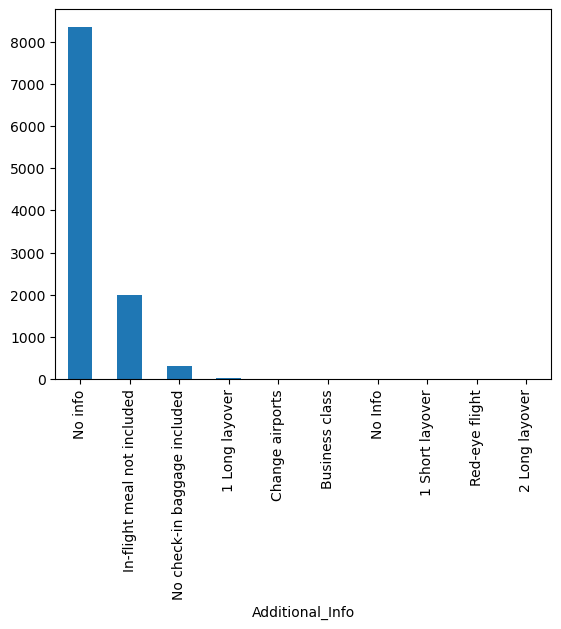

In [392]:
df['Additional_Info'].value_counts().plot(kind='bar')

# Conclussion
- we can see that most of the row contiain `No Info` so due to this reason we can drop this

# Conclussion
- Now we can extract all the necessary info now we can do drop the `unecessary col`
- `Route` we can drop this col b/c we have info about route i-e total stops.
- we can drop `Duration` b/c we can convert this into single minutes.
- we can drop `Additional_Info` col b/c in this col most of the rows contain `No Info` value so due to this reason i can drop this

**Now we can extract `Dep_hour` and `Dep_min` similarly for `arrival hour` and `arrival_min`**

# Depurtue

In [393]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

# Arrival

In [394]:
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

# Saperate the month year and date from `Date of journey`

In [395]:
df['Journey_year']=df['Date_of_Journey'].dt.year

In [396]:
df['Journey_month']=df['Date_of_Journey'].dt.month_name()
df['Journey_day']=df['Date_of_Journey'].dt.day_name()

**Now drop the unecessary col**

# Before Droping

In [397]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170.0,22,20,1,10,2019,March,Sunday


In [398]:
df.drop(columns=['Route','Duration','Additional_Info','Dep_Time','Arrival_Time','Date_of_Journey'],inplace=True)

# After Droping

In [399]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170.0,22,20,1,10,2019,March,Sunday


# Conclussion
- Now we can clean our data now we are ready to do `Exploratoy Data Analysis`

# Exploraroy Data Analysis
- In EDA we can perfrom some analysis and getting detail insights by plotting some graphs so that we can get more insights.

In [400]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170.0,22,20,1,10,2019,March,Sunday
1,Air India,Kolkata,Banglore,2,7662,445.0,5,50,13,15,2019,May,Wednesday


# Univariate Analysis

In [401]:
# Fun to plot graph
def fun_plot(col):
    v_count=df[col].value_counts()
    
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
    ax1.set_title(f"Distrubution of {col}")
    sns.barplot(x=v_count.index,
               y=v_count.values,ax=ax1,palette='muted')
    
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation='vertical')
    
    ax2.set_title(f"Pie Char of {col}")
    ax2.pie(v_count.values,labels=v_count.index,autopct="%.2f")
    plt.show()

# Airlines

In [402]:
airline=df['Airline'].value_counts()
airline

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

# Observation
- In this we will notice that we have total 12 classes.
- But 2 Bussiness classes i-e `Jet Airways Business` and `Vistara Premium economy`.
- Its count is very low so we also see that its normal class is also present so we will `bussiness class` to normal class.

In [403]:
df['Airline']=np.where(
    df['Airline']=='Vistara Premium economy','Vistara',
    np.where(df['Airline']=='Jet Airways Business','Jet Airways',
        df['Airline'])
)

In [404]:
airline=df['Airline'].value_counts()
airline

Airline
Jet Airways                          3855
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               482
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Trujet                                  1
Name: count, dtype: int64

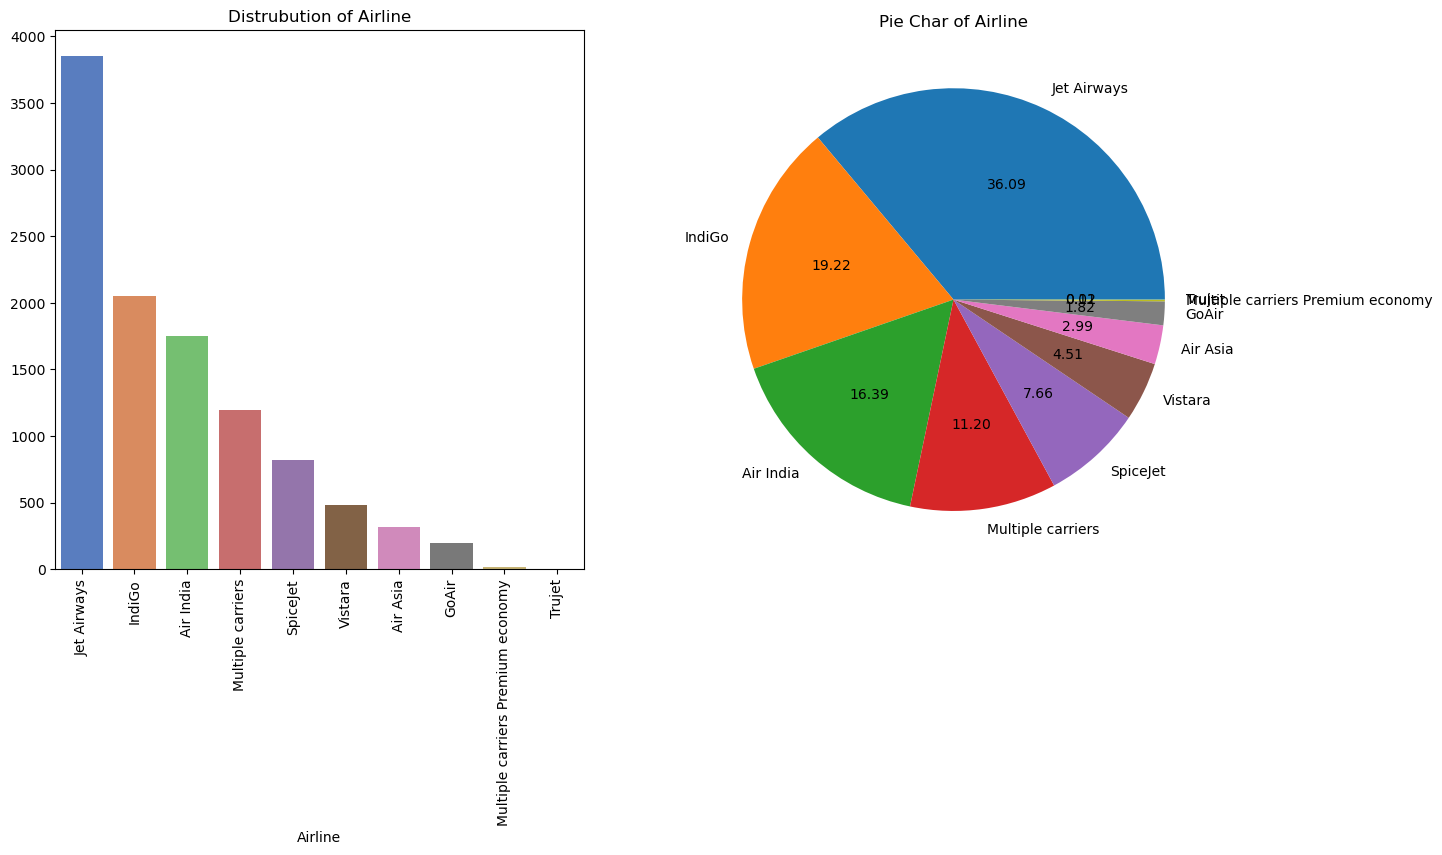

In [405]:
fun_plot("Airline")

# Observation
- We see that most of the pessenger will travel in `Jet Air way` and very less nbr of pessenger will travel in `Trujet`.

# Source

In [406]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

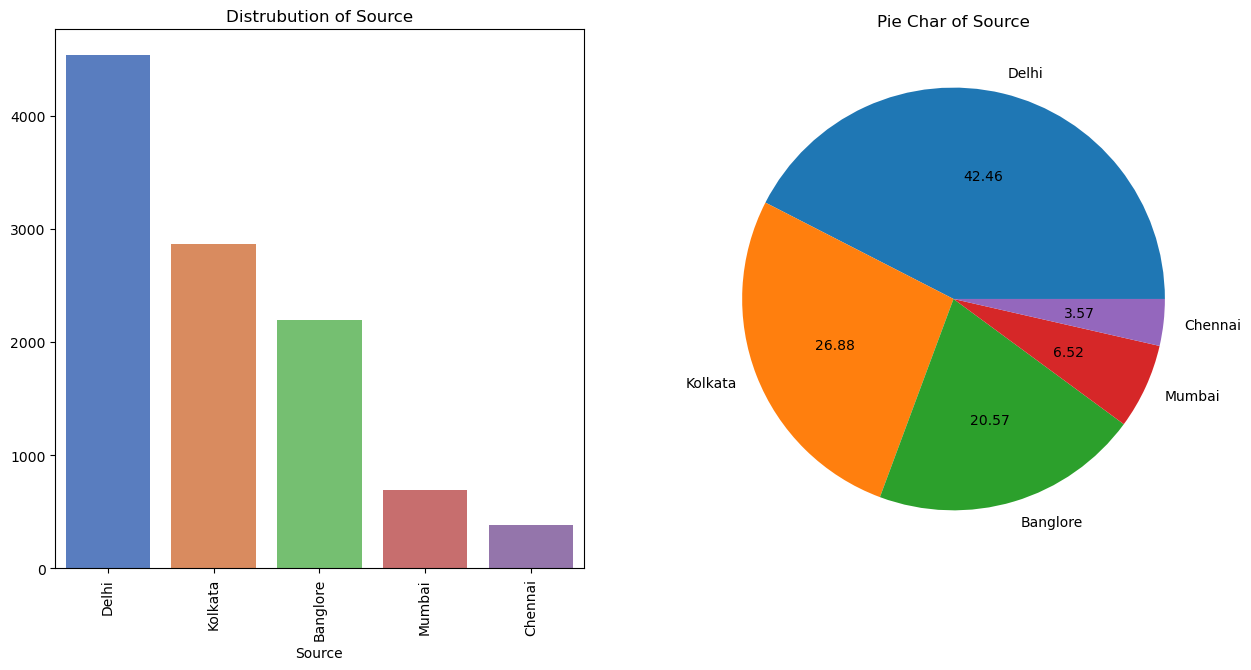

In [407]:
fun_plot('Source')

# Observation
- We can see the most of the coutomer can travel form `deheli`

# Destination

In [408]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

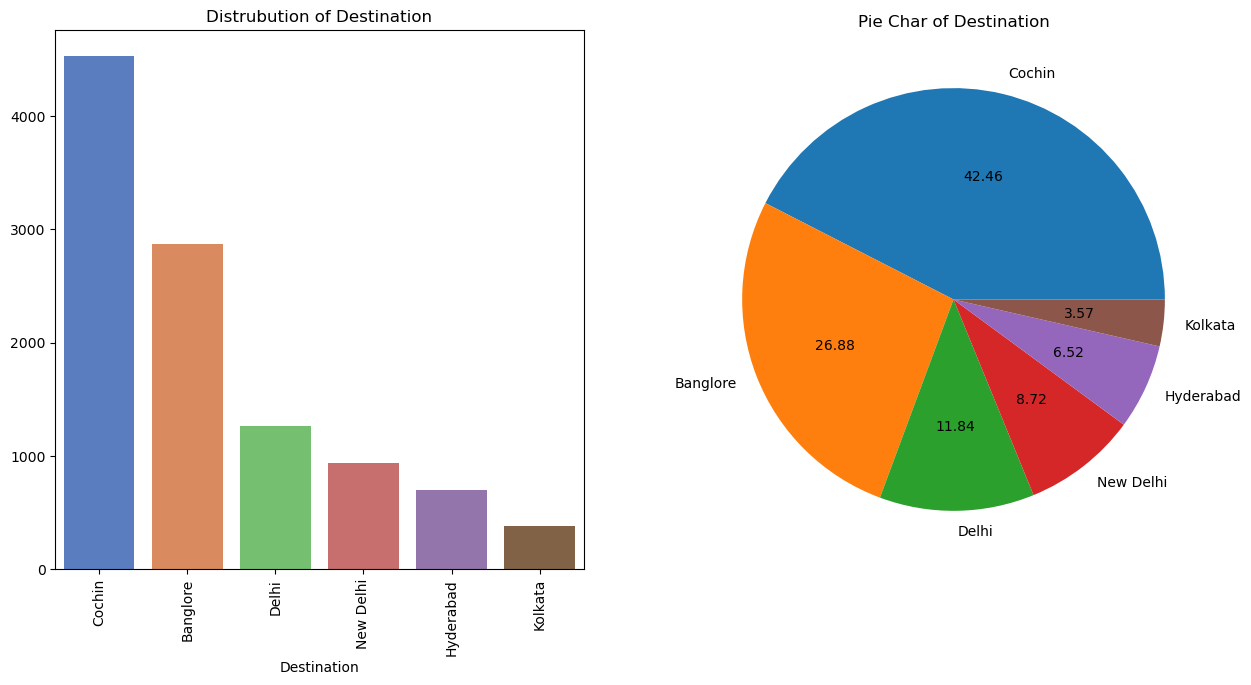

In [409]:
fun_plot("Destination")

# Observation
- We can see that most of the passenger dentination is `Deheli` to `Cochin`

# Total Stops

In [410]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

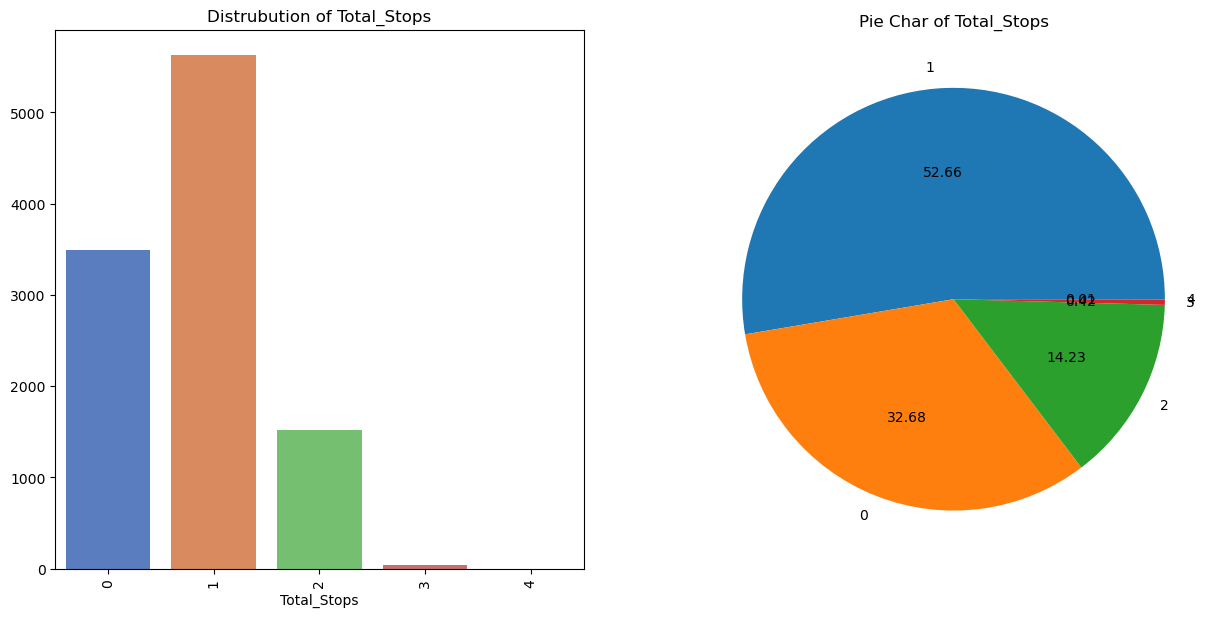

In [411]:
fun_plot("Total_Stops")

In [412]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170.0,22,20,1,10,2019,March,Sunday


# Observation
- We can see that most of the flight have 1 stops but there is one flight which have 4 stops so we can say that they are the outlies.
- Now we can drop the row which comtain 4 stops

In [414]:
df=df[~(df['Total_Stops']==4)]

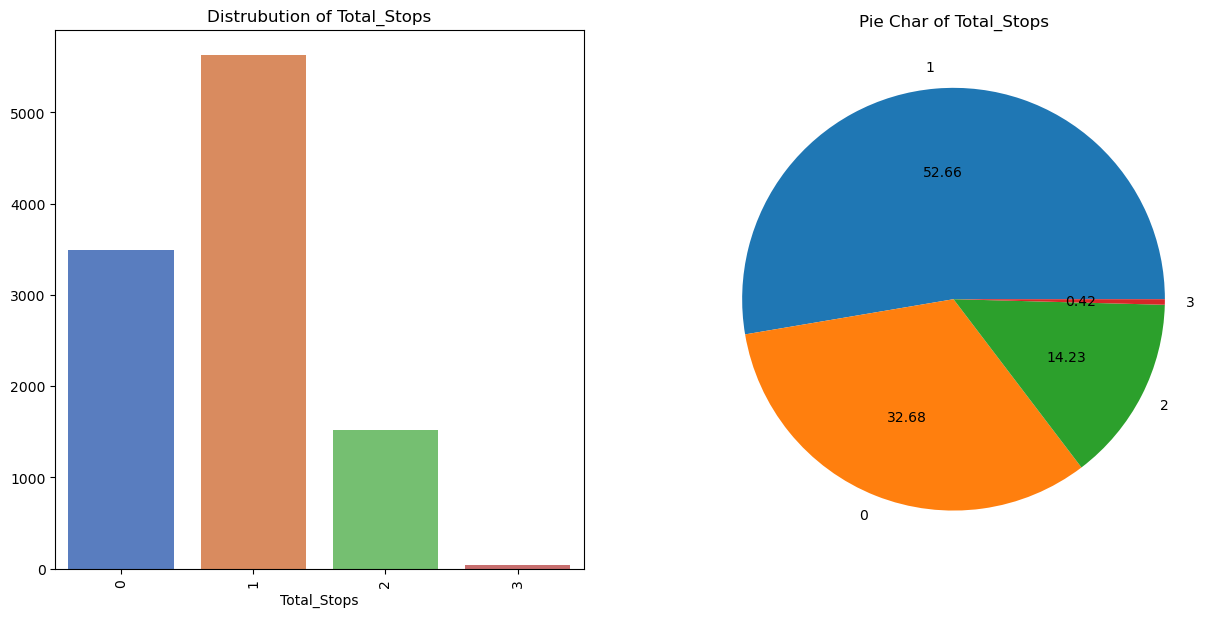

In [415]:
fun_plot("Total_Stops")

In [416]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170.0,22,20,1,10,2019,March,Sunday
1,Air India,Kolkata,Banglore,2,7662,445.0,5,50,13,15,2019,May,Wednesday


# Journey Month

In [417]:
df['Journey_month'].value_counts()

Journey_month
May      3465
June     3414
March    2723
April    1079
Name: count, dtype: int64

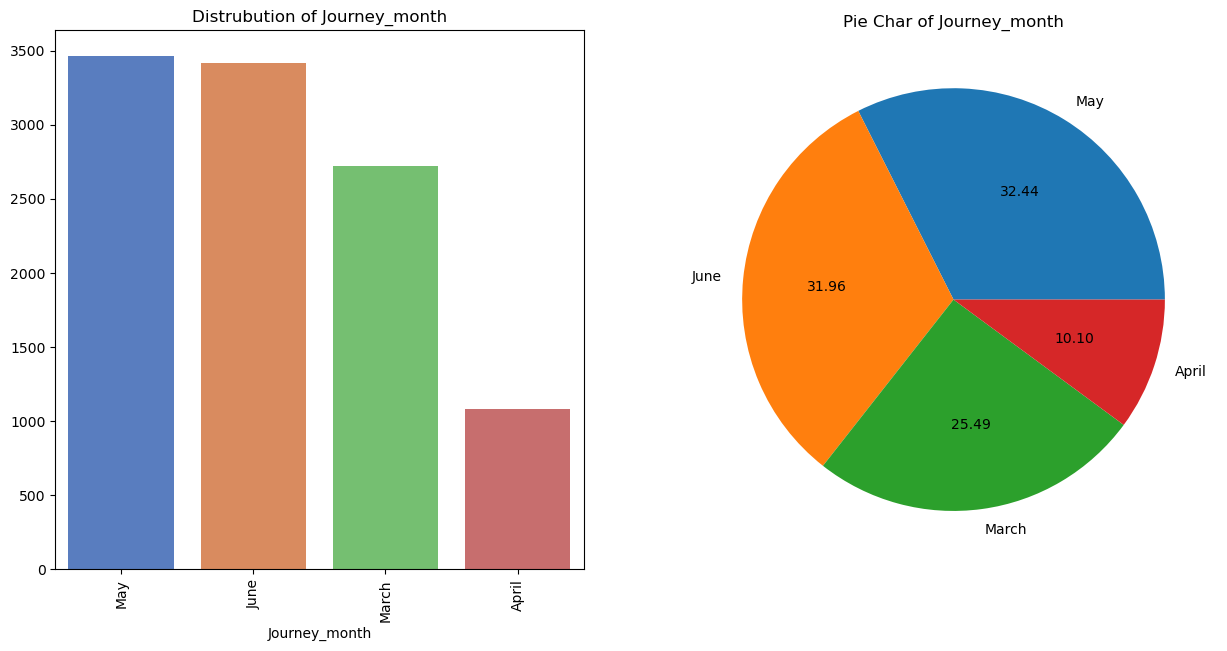

In [418]:
fun_plot('Journey_month')

# Observation 
- We see that most of the people can travel in month of `may`.
- very less nbr of people can travel in month of `April`

# Journey Day

In [419]:
df['Journey_day'].value_counts()

Journey_day
Wednesday    2079
Monday       1849
Thursday     1832
Saturday     1670
Sunday       1474
Friday        908
Tuesday       869
Name: count, dtype: int64

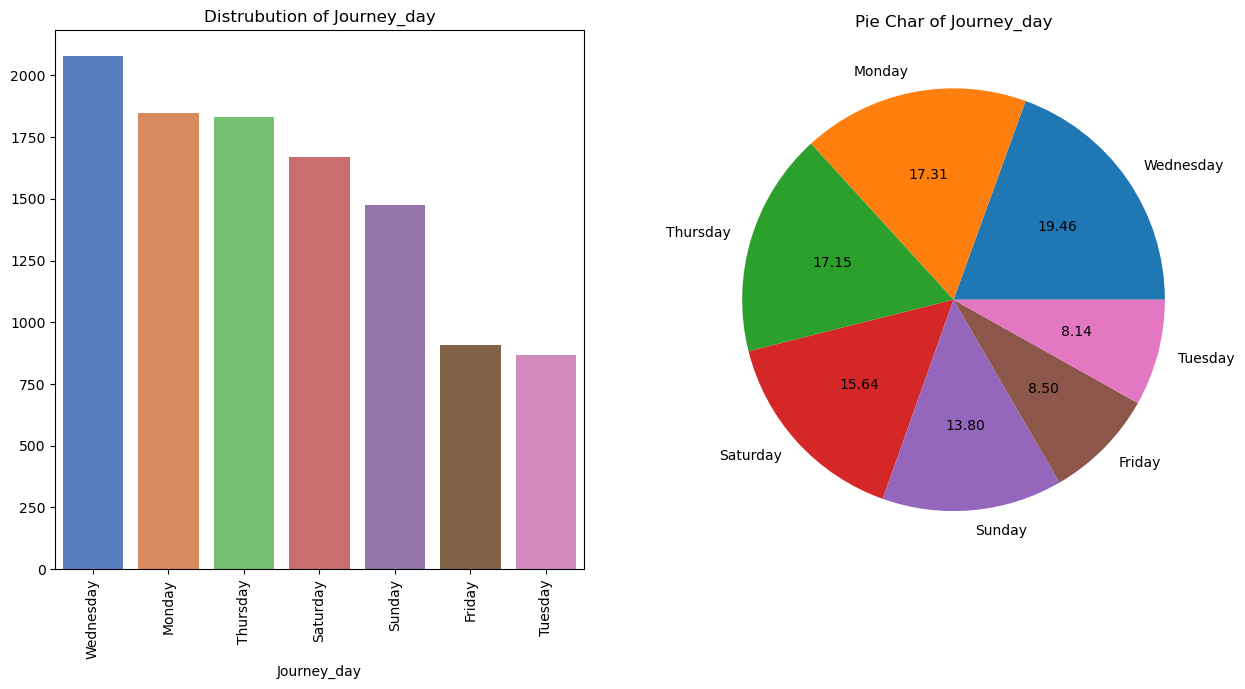

In [420]:
fun_plot("Journey_day")

# Observation
- Most of the person like to travel `Wenesday` and less people want to travel `Thusday`

# Numerical Col

## Price

In [421]:
def plot_numerical(col):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7))
    ax1.set_title(f"Distrubution of {col}")
    sns.histplot(df[col],ax=ax1)
    
    ax2.set_title(f"Distrubution of {col}")
    sns.distplot(df[col],ax=ax2)
    plt.show()

In [422]:
df['Price'].describe()

count    10681.000000
mean      9086.409512
std       4611.013975
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

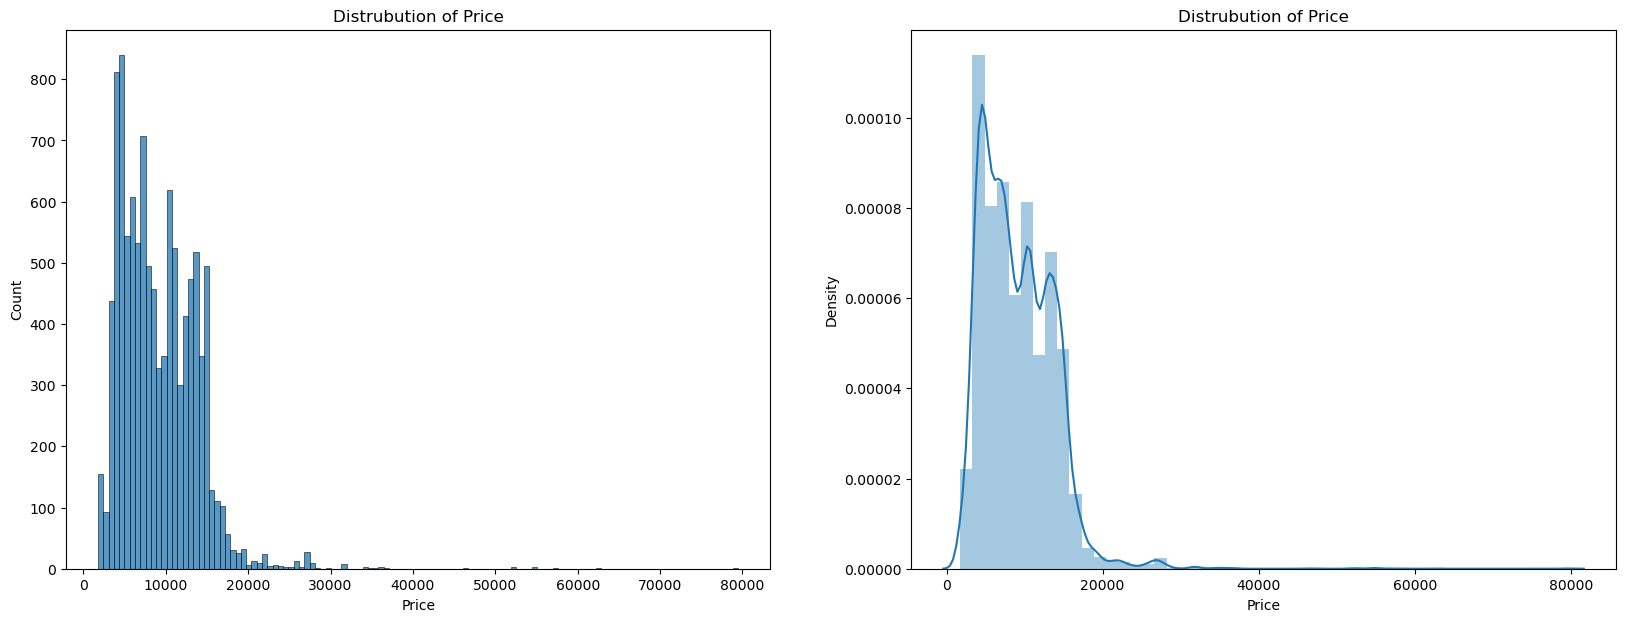

In [423]:
plot_numerical("Price")

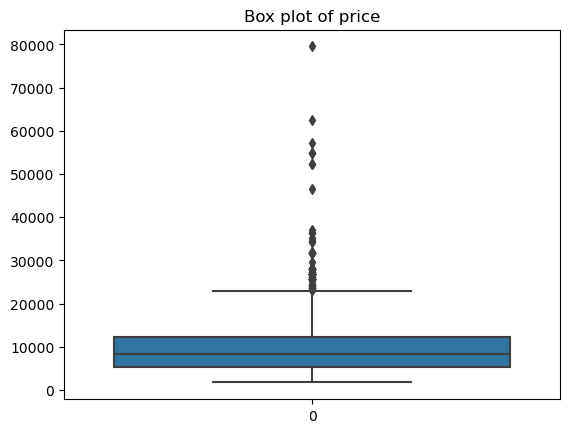

In [424]:
plt.title("Box plot of price")
sns.boxplot(df['Price'])
plt.show()

In [425]:
df[df['Price']>52000]

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
657,Jet Airways,Banglore,New Delhi,1,52229,300.0,5,45,10,45,2019,March,Friday
1478,Jet Airways,Banglore,New Delhi,1,54826,365.0,18,40,0,45,2019,March,Monday
2618,Jet Airways,Banglore,New Delhi,1,54826,375.0,22,50,5,5,2019,March,Monday
2924,Jet Airways,Banglore,New Delhi,1,79512,340.0,5,45,11,25,2019,March,Friday
5372,Jet Airways,Banglore,New Delhi,1,62427,400.0,5,45,12,25,2019,March,Friday
5439,Jet Airways,Banglore,New Delhi,1,54826,365.0,16,55,23,0,2019,March,Friday
9715,Jet Airways,Delhi,Cochin,2,52285,500.0,20,5,4,25,2019,March,Wednesday
10364,Jet Airways,Banglore,New Delhi,1,57209,280.0,9,45,14,25,2019,March,Friday


# Observation
- we can see that there is only one value whose price is `79000` so they are outlier we can remove them.
- we can also see that the price of `Banglor` to `Deheli` is high.
- Also see that all the flights can take 300- 375 min but one flight which can take 400 min.

**We can remove those value which price is greater the `60000` b/c these are only 2 values.**

In [426]:
df=df[~(df['Price']>60000)]

# Duration_in_min

In [427]:
df['Duration_In_Min'].describe()

count    10679.000000
mean       642.993726
std        507.743756
min         75.000000
25%        170.000000
50%        520.000000
75%        930.000000
max       2860.000000
Name: Duration_In_Min, dtype: float64

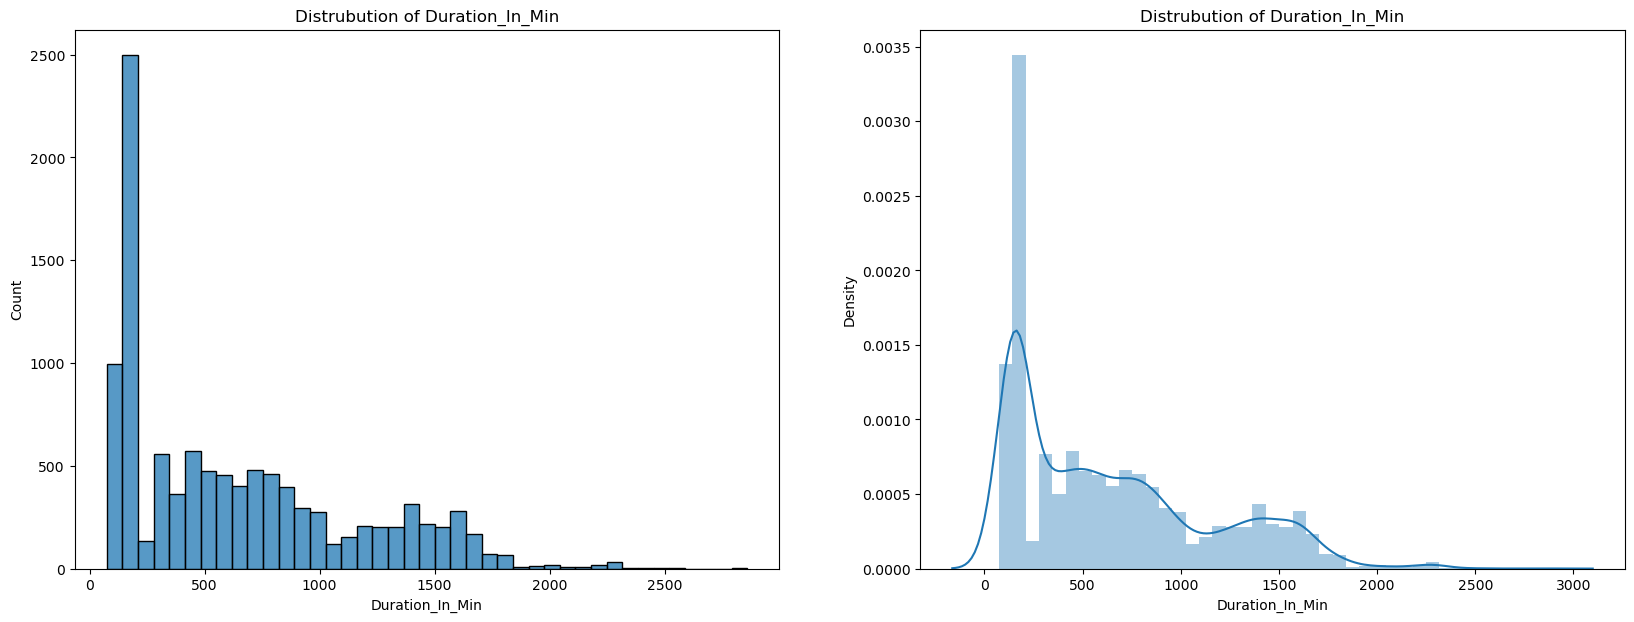

In [428]:
plot_numerical("Duration_In_Min")

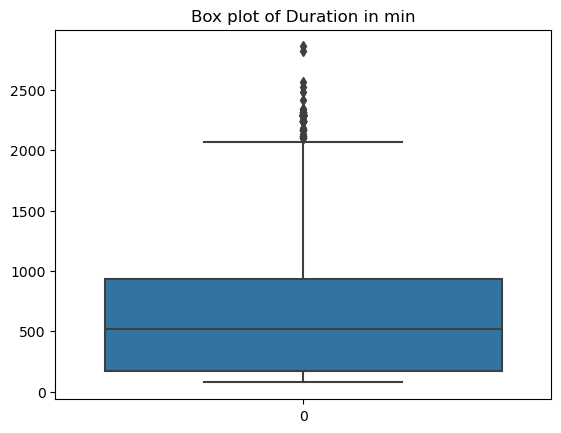

In [429]:
plt.title("Box plot of Duration in min")
sns.boxplot(df['Duration_In_Min'])
plt.show()

# Conclussion
- We can see that some flight who can take greater then 2000 min now check that.

In [430]:
df[df['Duration_In_Min']>2000].sample(10)

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
6085,Jet Airways,Delhi,Cochin,2,9328,2240.0,5,30,18,50,2019,March,Thursday
1657,Air India,Delhi,Cochin,2,9443,2295.0,5,0,19,15,2019,June,Wednesday
8412,Jet Airways,Delhi,Cochin,2,9254,2300.0,5,25,19,45,2019,March,Wednesday
1551,Jet Airways,Delhi,Cochin,2,9296,2245.0,6,20,19,45,2019,March,Wednesday
6884,Air India,Delhi,Cochin,3,10703,2280.0,5,15,19,15,2019,June,Thursday
4463,Air India,Delhi,Cochin,3,10703,2280.0,5,15,19,15,2019,June,Saturday
553,Air India,Delhi,Cochin,2,10598,2295.0,5,0,19,15,2019,March,Saturday
2172,Air India,Delhi,Cochin,3,10703,2280.0,5,15,19,15,2019,May,Saturday
7626,Jet Airways,Delhi,Cochin,2,20747,2045.0,18,20,4,25,2019,March,Sunday
1113,Jet Airways,Delhi,Cochin,2,16389,2300.0,5,25,19,45,2019,March,Wednesday


# Observation
- after checking we can see that those flight who can go `Dehli` to `Cochin` can take to mush time.
# Reason 
- Reason is it can contain 2-3 stops thats why.

# Bi-Variate Analysis
## Num-Num Col

# Price vs Duration-in-min

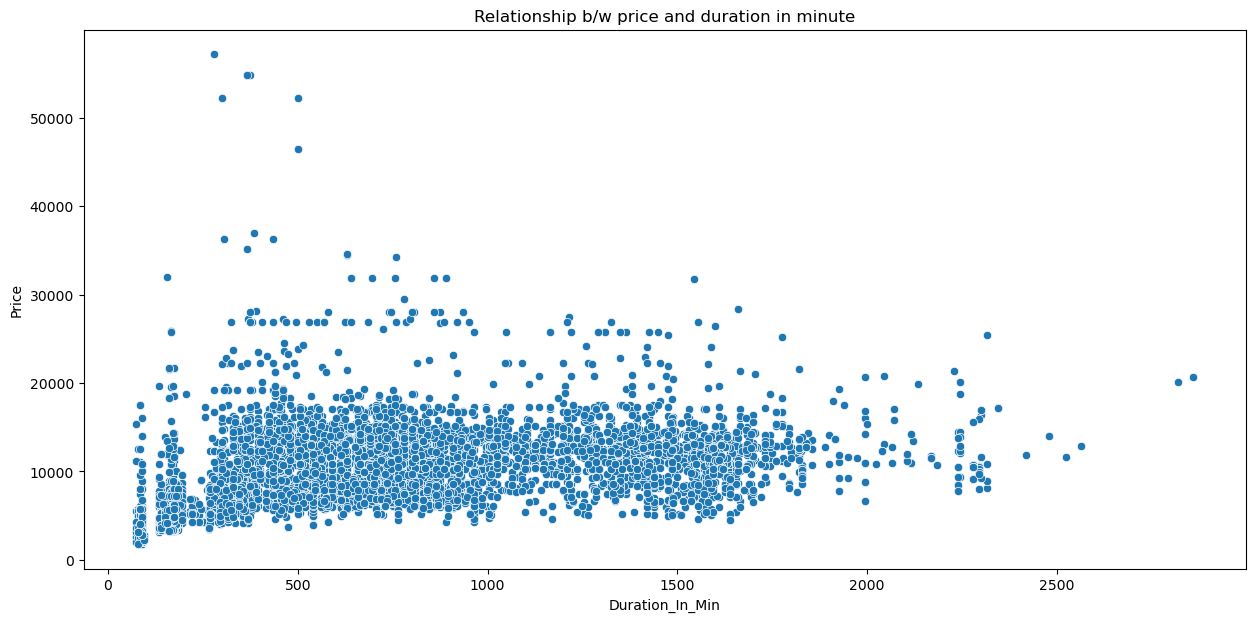

In [432]:
plt.figure(figsize=(15,7))
plt.title("Relationship b/w price and duration in minute")
sns.scatterplot(x=df['Duration_In_Min'],
               y=df['Price'])
plt.show()

In [433]:
# Pending

# Price vs Journey_year

**There is no relation b/w price and journey year b/c we have data of only 2019**

In [434]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170.0,22,20,1,10,2019,March,Sunday


# Price Vs Journey Month

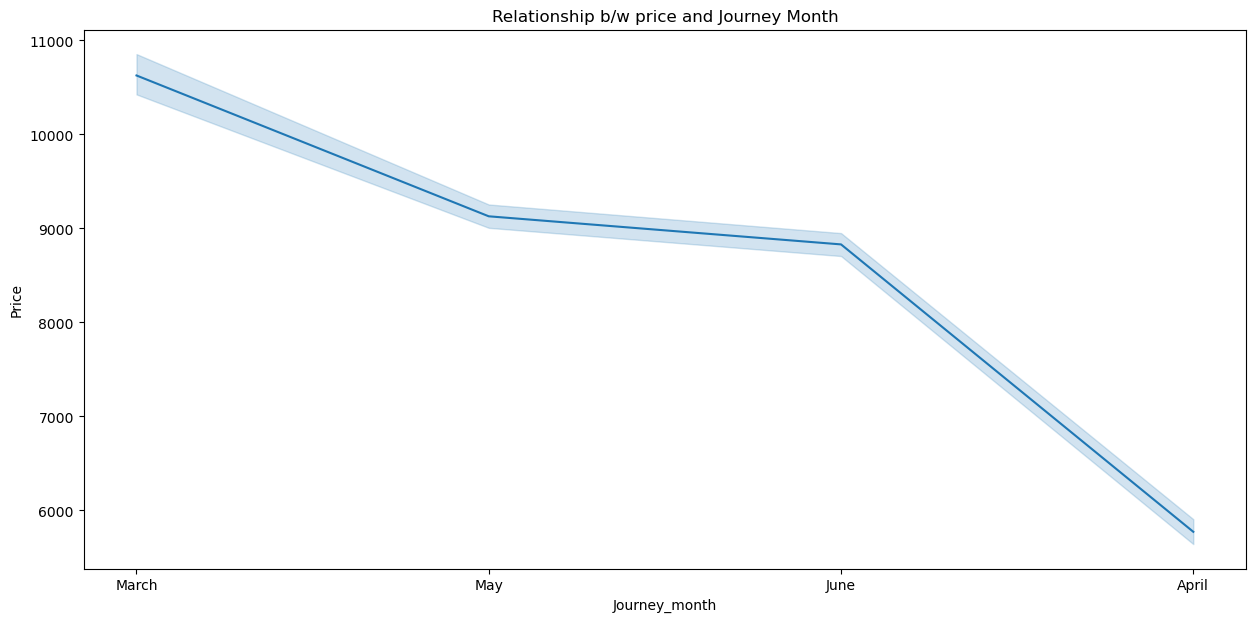

In [437]:
plt.figure(figsize=(15,7))
plt.title("Relationship b/w price and Journey Month")
sns.lineplot(x=df['Journey_month'],
               y=df['Price'])
plt.show()

# Observation
- We can see that price should be continuously decrease  from `May` to `April`.

# price vs journey day

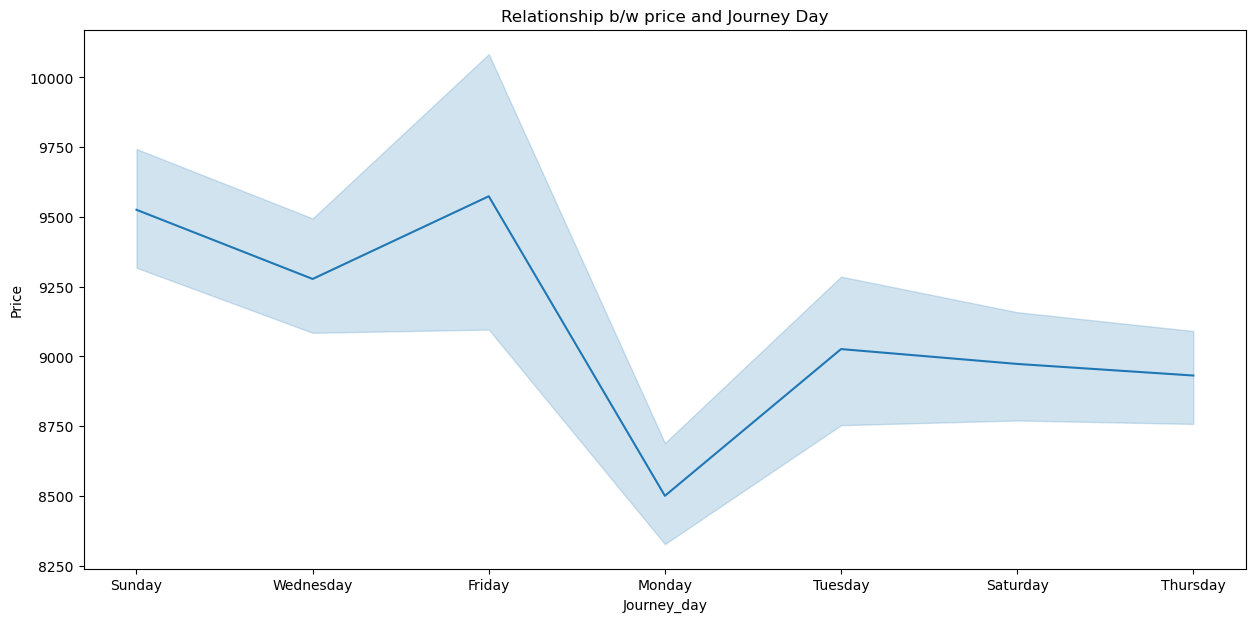

In [438]:
plt.figure(figsize=(15,7))
plt.title("Relationship b/w price and Journey Day")
sns.lineplot(x=df['Journey_day'],
               y=df['Price'])
plt.show()

# Observation
- We see that in sunday price of the flights is high but in mondy price shiuld be low.
- Its logical b/c generally in  sunday is a off day so ervery one want to enjoying and any one go to trip.
- In monday in a busy day every one go and bussy in your work so they can't travel,

**Now we will check whcih month of which day price is low**

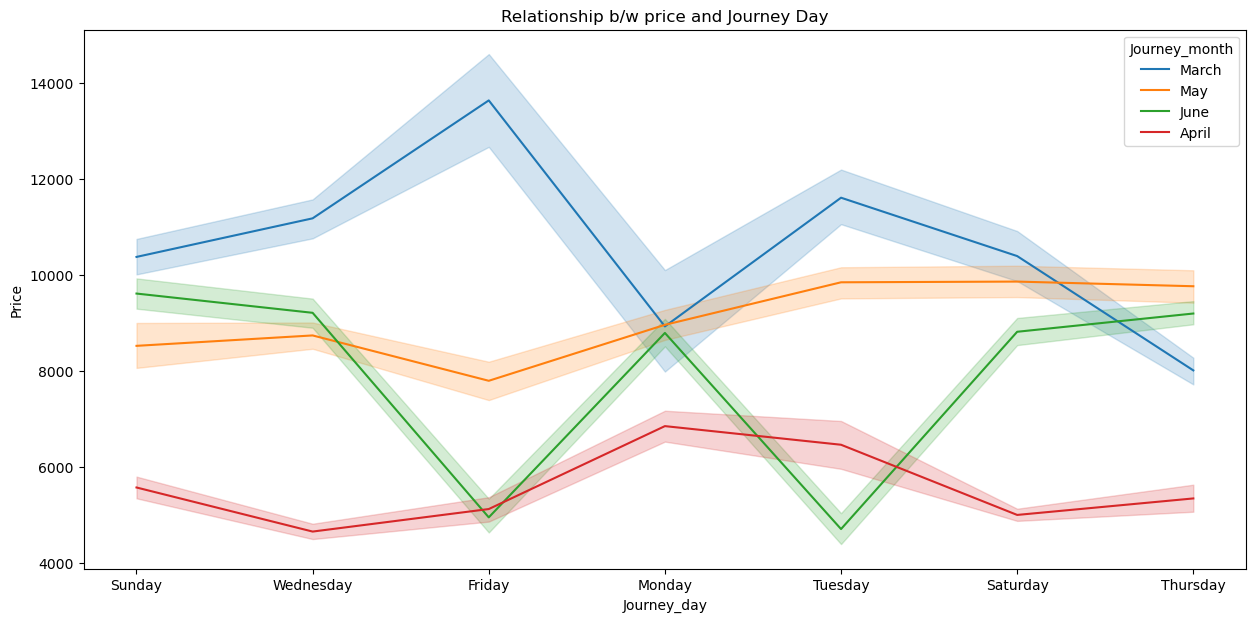

In [446]:
plt.figure(figsize=(15,7))
plt.title("Relationship b/w price and Journey Day")
sns.lineplot(x=df['Journey_day'],
               y=df['Price'],hue=df['Journey_month'])

plt.show()

# Observation
- We see that in  month `march`  and day `Thusday` price will low but in `Friday` price will high.
- We see that in  month `May`  and day `Friday` price will low but in `Thusday` price will high.
- We see that in  month `June`  and day `Friday` price will low but in `Sunday` price will high.
- We see that in  month `April`  and day `Wenesday` price will low but in `Monday` price will high.

In [458]:
temp=df.groupby(['Journey_month','Journey_day'])['Price'].mean().reset_index().sort_values(by='Journey_day',ascending=True)
temp.head()

,Journey_month,Journey_day,Price
0,April,Friday,5124.031746
21,May,Friday,7794.789894
14,March,Friday,13633.379888
7,June,Friday,4950.724771
1,April,Monday,6850.841040


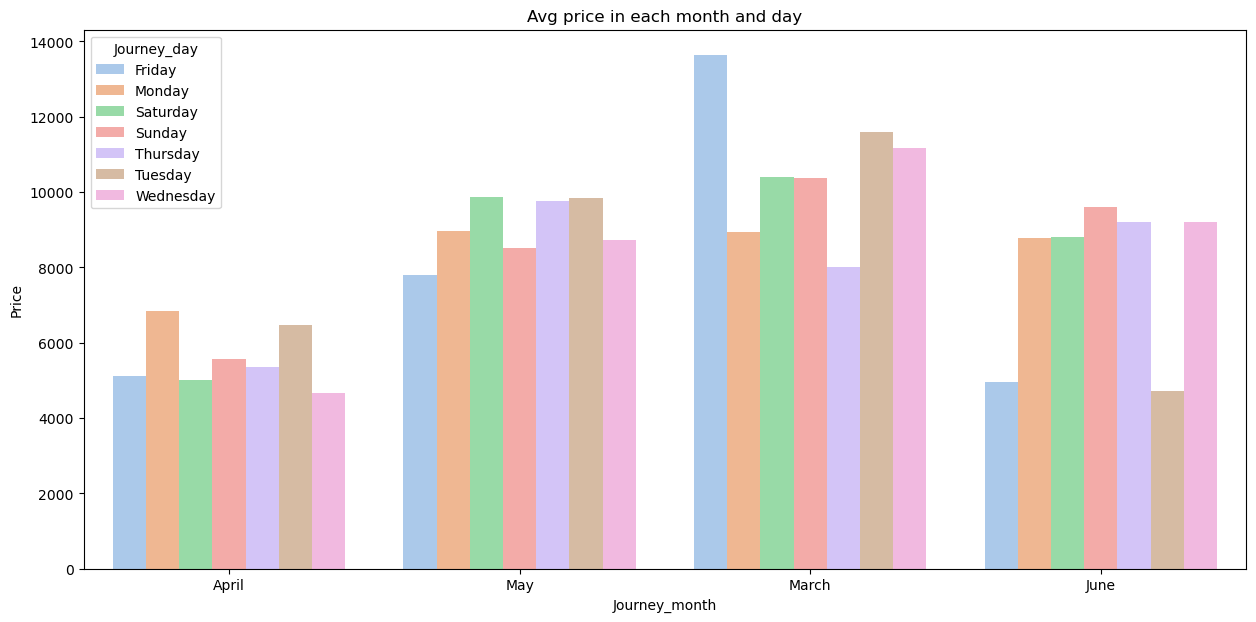

In [464]:
plt.figure(figsize=(15,7))
plt.title(f"Avg price in each month and day")
sns.barplot(x=temp['Journey_month'],
               y=temp['Price'],hue=temp['Journey_day'],palette='pastel')
plt.show()

# Observation
- This will show the average price in each month

# Price vs Dep_hour

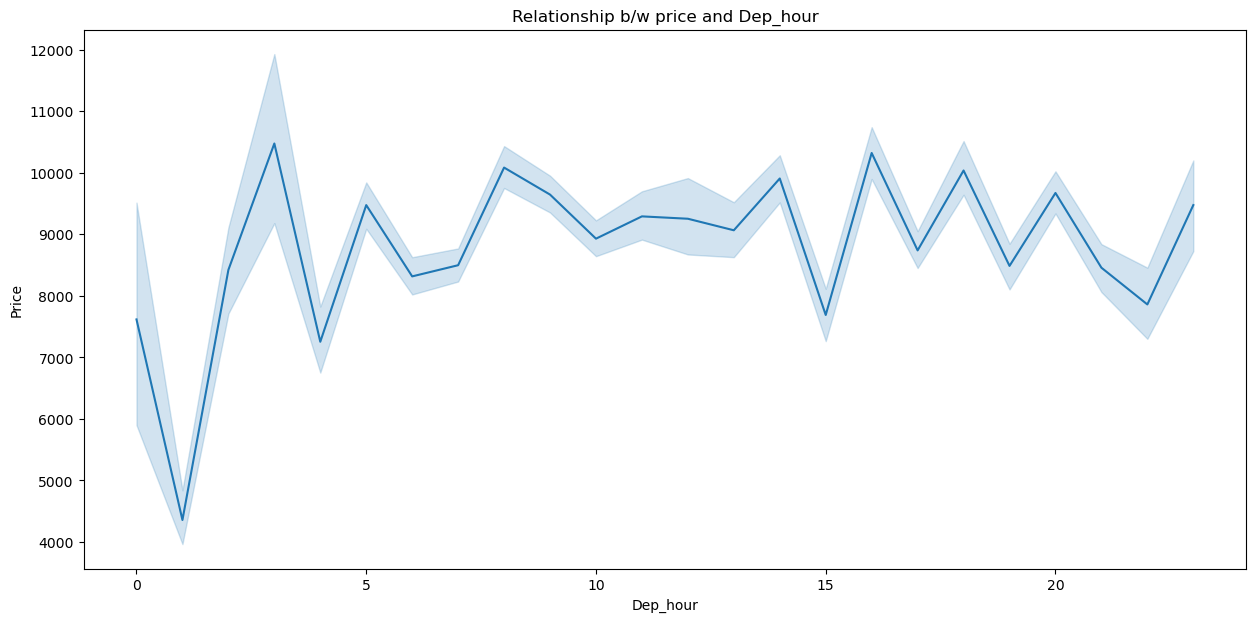

In [465]:
plt.figure(figsize=(15,7))
plt.title("Relationship b/w price and Dep_hour")
sns.lineplot(x=df['Dep_hour'],
               y=df['Price'])
plt.show()

# Observation
- This will show that how the price will vary in each hour

# Numerical-Categorical
# Price vs Airline

In [466]:
air_price=df.groupby(['Airline'])['Price'].mean().reset_index()
air_price

,Airline,Price
0,Air Asia,5590.260188
1,Air India,9607.814286
2,GoAir,5861.056701
3,IndiGo,5673.682903
4,Jet Airways,11685.874384
5,Multiple carriers,10902.678094
6,Multiple carriers Premium economy,11418.846154
7,SpiceJet,4338.284841
8,Trujet,4140.000000
9,Vistara,7803.605809


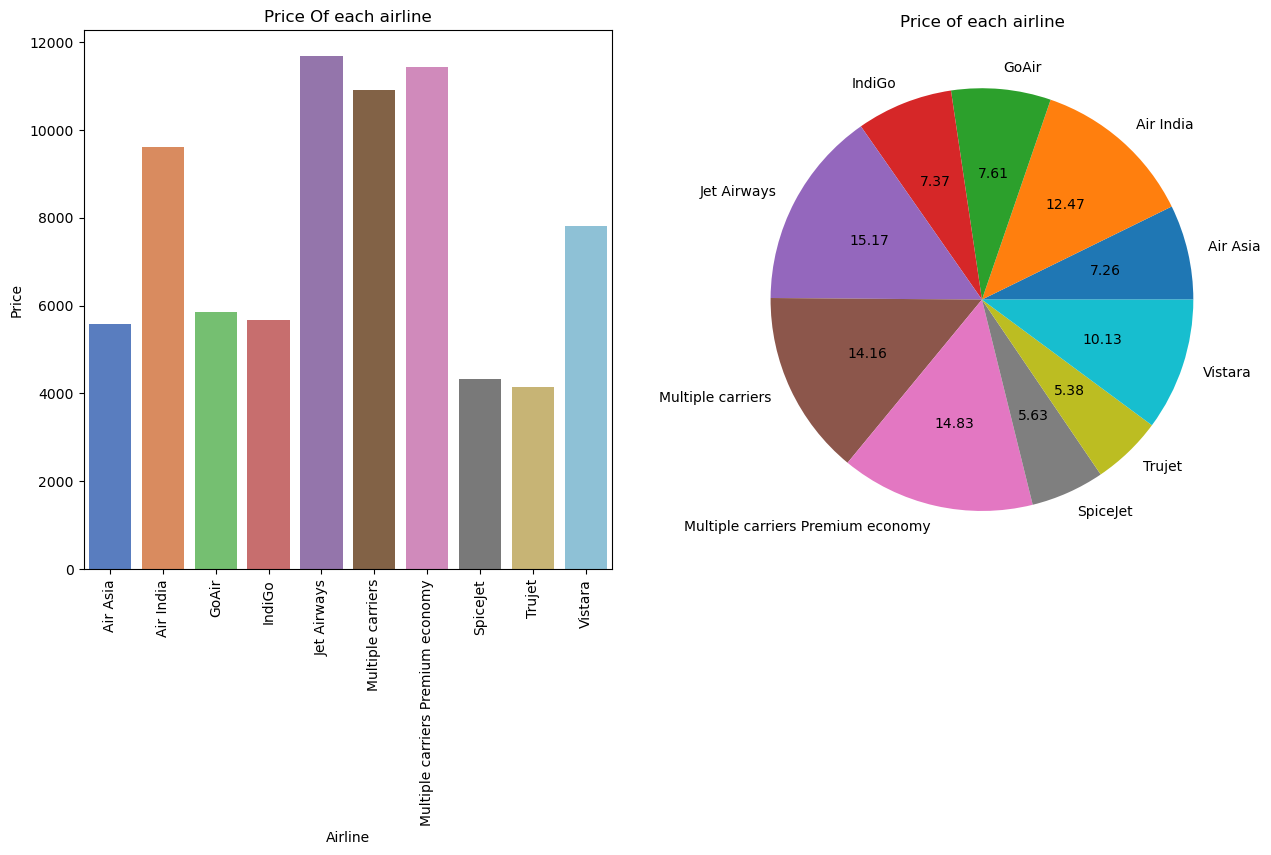

In [467]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
ax1.set_title(f"Price Of each airline")
sns.barplot(x=air_price['Airline'],
               y=air_price['Price'],ax=ax1,palette='muted')
    
ax1.set_xticklabels(ax1.get_xticklabels(), rotation='vertical')
    
ax2.set_title(f"Price of each airline")
ax2.pie(air_price['Price'],labels=air_price['Airline'],autopct="%.2f")
plt.show()

# Observation
- We can see that `Price of Jet Airway` is very high.

# Price vs Source

In [468]:
source=df.groupby(['Source'])['Price'].mean().reset_index()
source

,Source,Price
0,Banglore,7955.671832
1,Chennai,4789.892388
2,Delhi,10540.113536
3,Kolkata,9158.389411
4,Mumbai,5059.708752


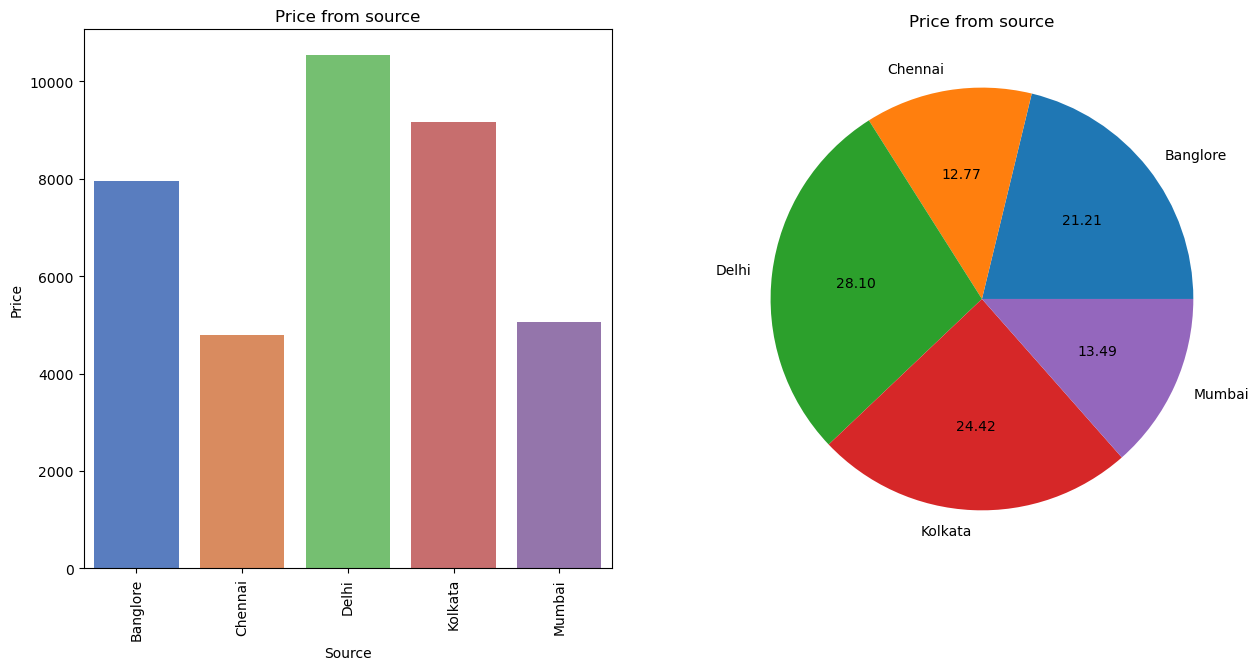

In [469]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
ax1.set_title(f"Price from source")
sns.barplot(x=source['Source'],
               y=source['Price'],ax=ax1,palette='muted')
    
ax1.set_xticklabels(ax1.get_xticklabels(), rotation='vertical')
    
ax2.set_title(f"Price from source")
ax2.pie(source['Price'],labels=source['Source'],autopct="%.2f")
plt.show()

# Observation 
- If coustomer can select yout destination `Chennai` or `Mumbai` the price of flight is less as compare to others.

# Destinatio vs Price

In [470]:
destination=df.groupby(['Destination'])['Price'].mean().reset_index()
destination

,Destination,Price
0,Banglore,9158.389411
1,Cochin,10540.113536
2,Delhi,5143.918577
3,Hyderabad,5059.708752
4,Kolkata,4789.892388
5,New Delhi,11784.377826


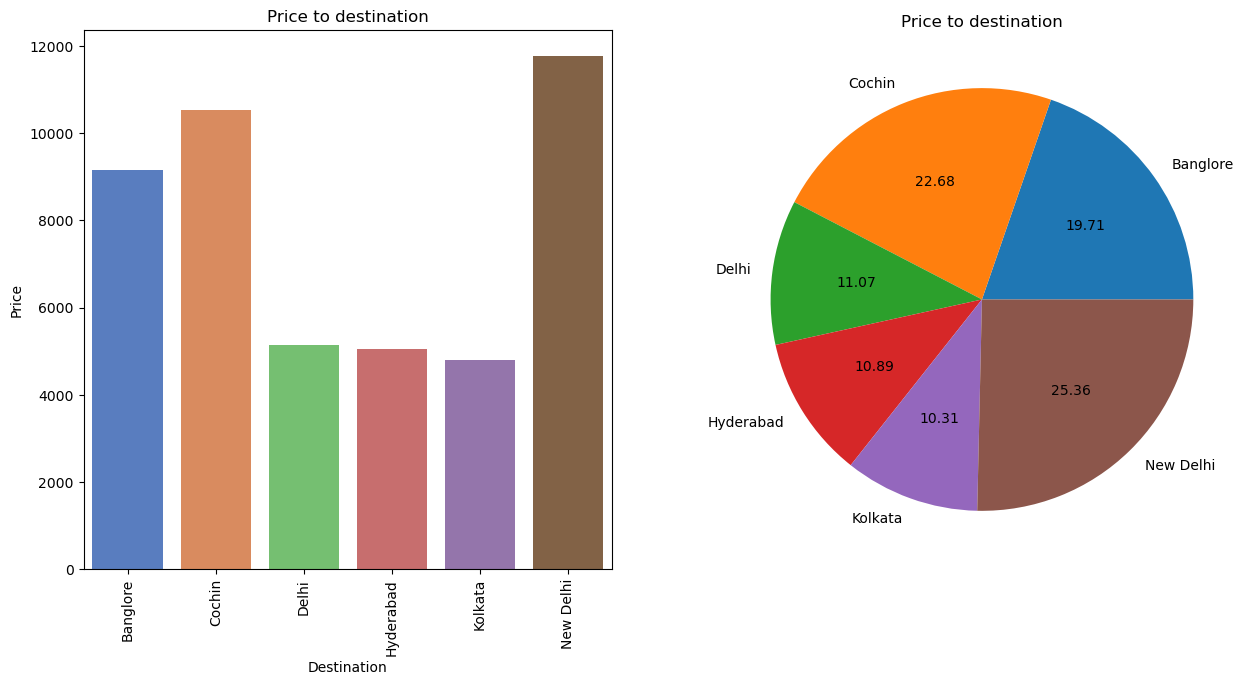

In [471]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
ax1.set_title(f"Price to destination")
sns.barplot(x=destination['Destination'],
               y=destination['Price'],ax=ax1,palette='muted')
    
ax1.set_xticklabels(ax1.get_xticklabels(), rotation='vertical')
    
ax2.set_title(f"Price to destination")
ax2.pie(destination['Price'],labels=destination['Destination'],autopct="%.2f")
plt.show()

# Observation
- If costomer distination is `Dehli Hydrabad Kolkata` its price is low as compare to other.

In [472]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170.0,22,20,1,10,2019,March,Sunday
1,Air India,Kolkata,Banglore,2,7662,445.0,5,50,13,15,2019,May,Wednesday


# Price vs Stops

In [473]:
stops=df.groupby(['Total_Stops'])['Price'].mean().reset_index()
stops

,Total_Stops,Price
0,0,5024.900315
1,1,10572.649120
2,2,12715.807895
3,3,13112.000000


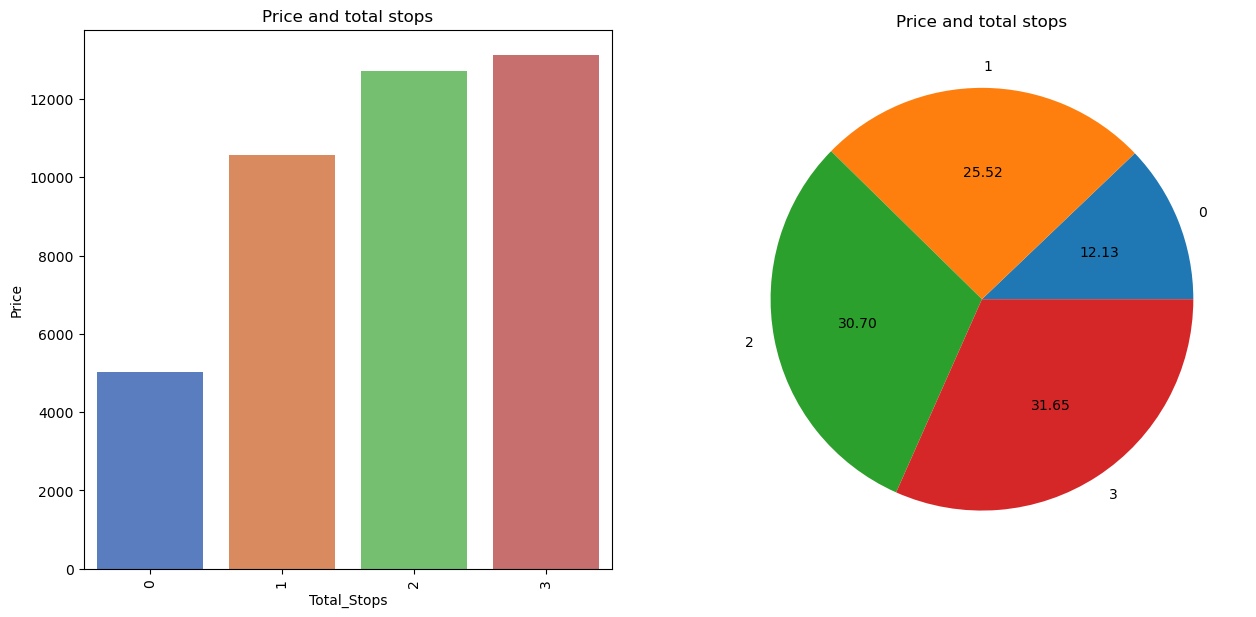

In [474]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
ax1.set_title(f"Price and total stops")
sns.barplot(x=stops['Total_Stops'],
               y=stops['Price'],ax=ax1,palette='muted')
    
ax1.set_xticklabels(ax1.get_xticklabels(), rotation='vertical')
    
ax2.set_title(f"Price and total stops")
ax2.pie(stops['Price'],labels=stops['Total_Stops'],autopct="%.2f")
plt.show()

# Observation
- we can see that if there is no stop its average price is very low the reason is there is less nbr of people can travel with no stop.
- We can also see that flight with 1-4 stops its avg price is high the reason is most of the people can travel in stay fligh due to this reasosn its mean or average is high.
- But genrally if there is more stop price should be low.

In [475]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_year,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170.0,22,20,1,10,2019,March,Sunday
1,Air India,Kolkata,Banglore,2,7662,445.0,5,50,13,15,2019,May,Wednesday


# Correlation

In [476]:
df.select_dtypes('number').corr()['Price']

Total_Stops        0.613790
Price              1.000000
Duration_In_Min    0.516762
Dep_hour           0.010488
Dep_min           -0.027948
Arrival_hour       0.025452
Arrival_min       -0.087688
Journey_year            NaN
Name: Price, dtype: float64

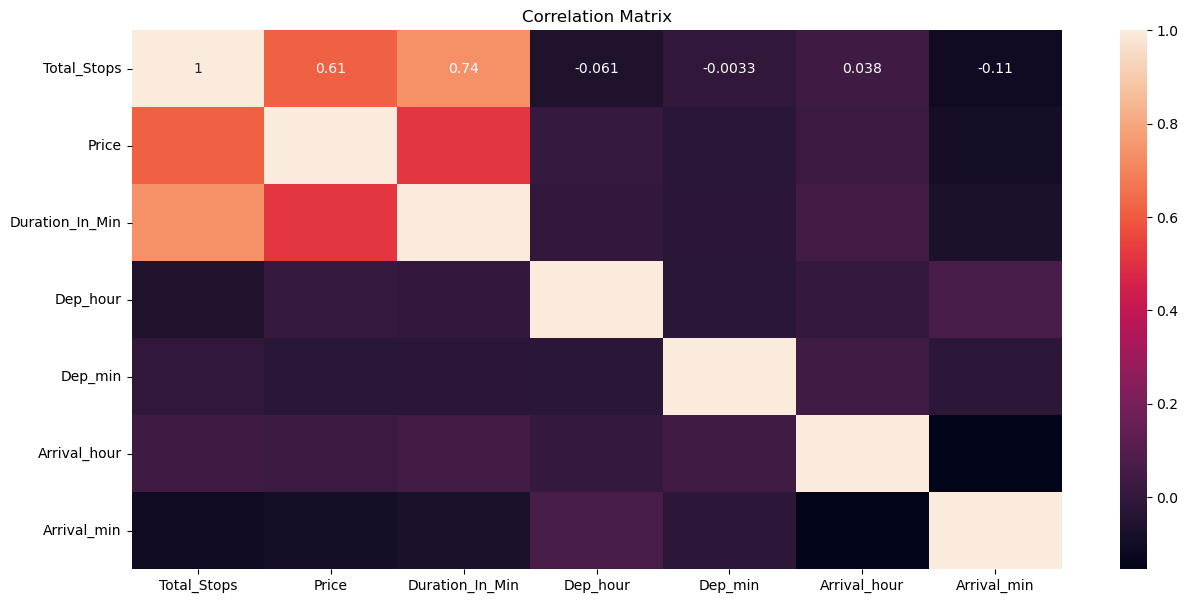

In [631]:
plt.figure(figsize=(15,7))
plt.title("Correlation Matrix")
sns.heatmap(df.select_dtypes('number').corr(),annot=True)
plt.show()

# Model Building

**We can drop the `journey year col` b/c it contain only 1 value and it can;t be change so we can drop this**

In [556]:
df.drop(columns=['Journey_year'],inplace=True)

In [557]:
df.head(1)

,Airline,Source,Destination,Total_Stops,Price,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170.0,22,20,1,10,March,Sunday


# Save the clean file

In [587]:
df.to_csv("flight_clean.csv")

In [602]:
from sklearn.model_selection import train_test_split,cross_val_score

In [667]:
feature=df.drop(columns=['Price'])
label=df['Price']

In [668]:
feature.head(1)

,Airline,Source,Destination,Total_Stops,Duration_In_Min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_month,Journey_day
0,IndiGo,Banglore,New Delhi,0,170.0,22,20,1,10,March,Sunday


In [669]:
label.head(2)

0    3897
1    7662
Name: Price, dtype: int64

In [670]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=43)

In [671]:
x_train.shape

(8543, 11)

In [672]:
x_test.shape

(2136, 11)

In [673]:
y_train.shape

(8543,)

In [674]:
y_test.shape

(2136,)

# Saperature Numerical and Categorical Col

In [675]:
num_col=feature.select_dtypes('number').columns
num_col

Index(['Total_Stops', 'Duration_In_Min', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')

In [676]:
cat_col=feature.select_dtypes("object").columns
cat_col

Index(['Airline', 'Source', 'Destination', 'Journey_month', 'Journey_day'], dtype='object')

# Building Pipelines

In [677]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer

In [678]:
num_pipe=Pipeline(steps=[
    ("Impute",SimpleImputer(strategy='median')),
    ("scale",StandardScaler()),
])
num_pipe

Pipeline(steps=[('Impute', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())])

In [679]:
cat_pipe=Pipeline(steps=[
    ("inpute",SimpleImputer(strategy="most_frequent")),
    ('encode',OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first'))
])
cat_pipe

Pipeline(steps=[('inpute', SimpleImputer(strategy='most_frequent')),
                ('encode',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

# Build a Transformer

In [680]:
trasform=ColumnTransformer(transformers=[
    ("num_trans",num_pipe,num_col),
    ("cat_trans",cat_pipe,cat_col)
],remainder='passthrough')
trasform

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_trans',
                                 Pipeline(steps=[('Impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 Index(['Total_Stops', 'Duration_In_Min', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')),
                                ('cat_trans',
                                 Pipeline(steps=[('inpute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Airline', 'Source', 'Destination', 'Journey_month', 'Journey_day'], dtype='object'))])

# Build final Pipeline

In [681]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [682]:
final=Pipeline(steps=[
    ("Process",trasform),
    ("model",RandomForestRegressor())
])
final

Pipeline(steps=[('Process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Total_Stops', 'Duration_In_Min', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Airline', 'Source', 'Destination', 'Journey_month', 'Journey_day'], dtype='object'))])),
                ('model', RandomForestRegressor())])

In [683]:
final.fit(x_train,y_train)

Pipeline(steps=[('Process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_trans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Total_Stops', 'Duration_In_Min', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('inpute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Airline', 'Source', 'Destination', 'Journey_month', 'Journey_day'], dtype='object'))])),
                ('model', RandomForestRegressor())])

# prediction

In [684]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [685]:
def evulation(actual,pre,n,k):
    r2=r2_score(actual,pre)
    return {
        "Mean Square Error":mean_squared_error(actual,pre),
        "Mean Absoulute Error":mean_absolute_error(actual,pre),
        "R2_Score":r2,
        "Adjusted R2_score":1 - ((1 - r2) * (n - 1)) / (n - k - 1)
    }

In [686]:
y_pred=final.predict(x_test)

In [687]:
evulation(actual=y_test,pre=y_pred,n=x_train.shape[0],k=x_train.shape[1])

{'Mean Square Error': 6912436.550161321,
 'Mean Absoulute Error': 1467.3772591639272,
 'R2_Score': 0.6670522423564577,
 'Adjusted R2_score': 0.6666229344987529}

# Now Try Different Model

In [623]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(alpha=0.001),
    "Lasso":Lasso(alpha=0.001),
    "RandomForest":RandomForestRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "xgboost":XGBRegressor(),
    "Gradiant Boost":GradientBoostingRegressor(learning_rate=0.001)
}

Model  LinearRegression
Fit the model
Prediction
Evulation
Train Cross validation
Test Cross validation


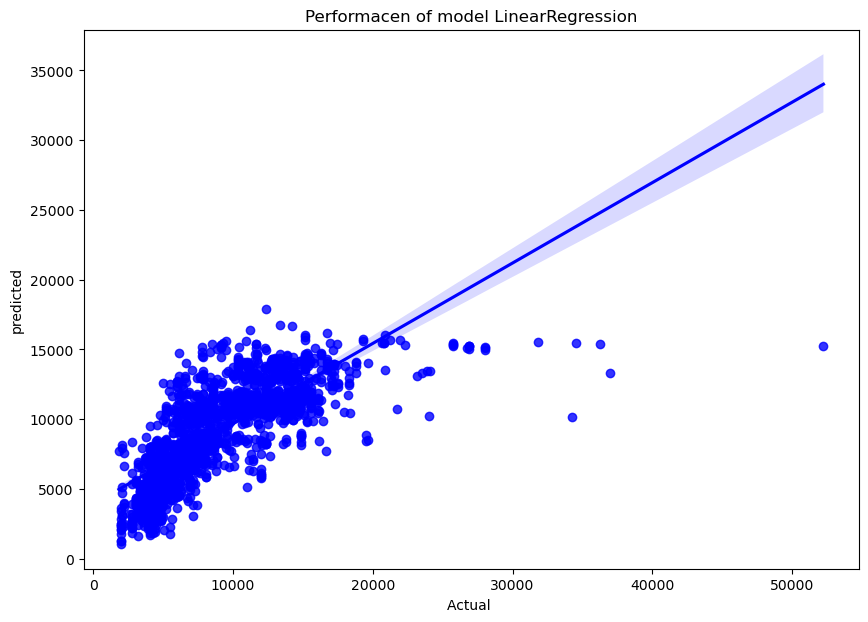

Model  Ridge
Fit the model
Prediction
Evulation
Train Cross validation
Test Cross validation


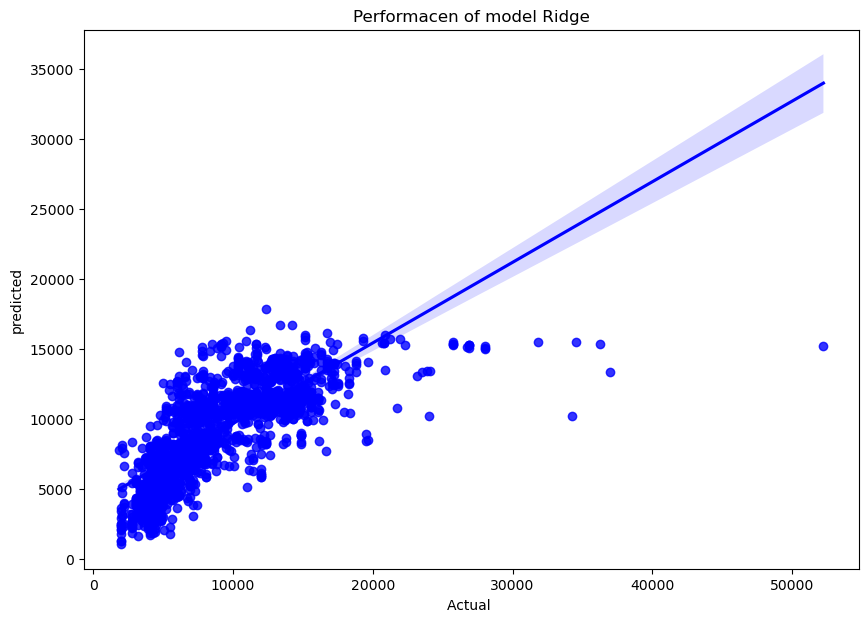

Model  Lasso
Fit the model
Prediction
Evulation
Train Cross validation
Test Cross validation


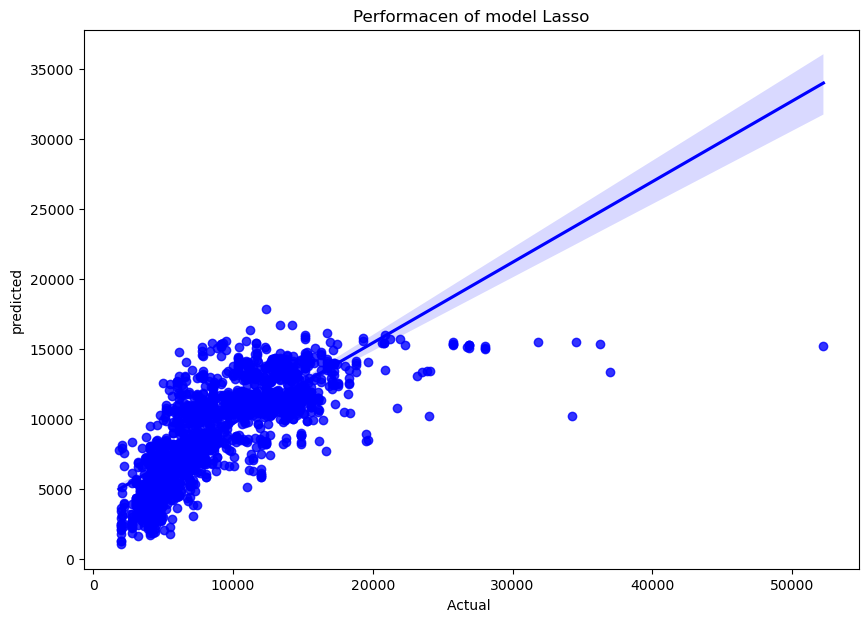

Model  RandomForest
Fit the model
Prediction
Evulation
Train Cross validation
Test Cross validation


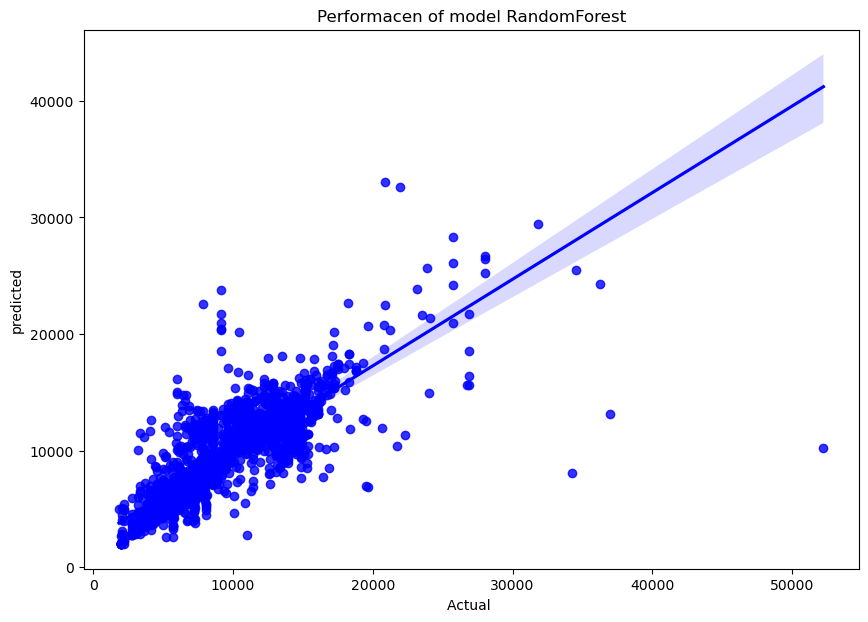

Model  AdaBoost
Fit the model
Prediction
Evulation
Train Cross validation
Test Cross validation


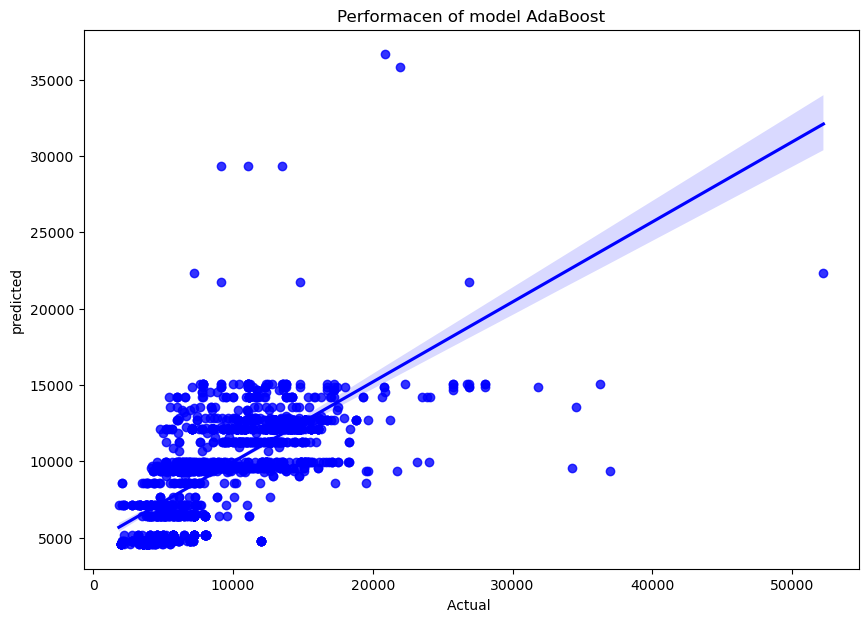

Model  xgboost
Fit the model
Prediction
Evulation
Train Cross validation
Test Cross validation


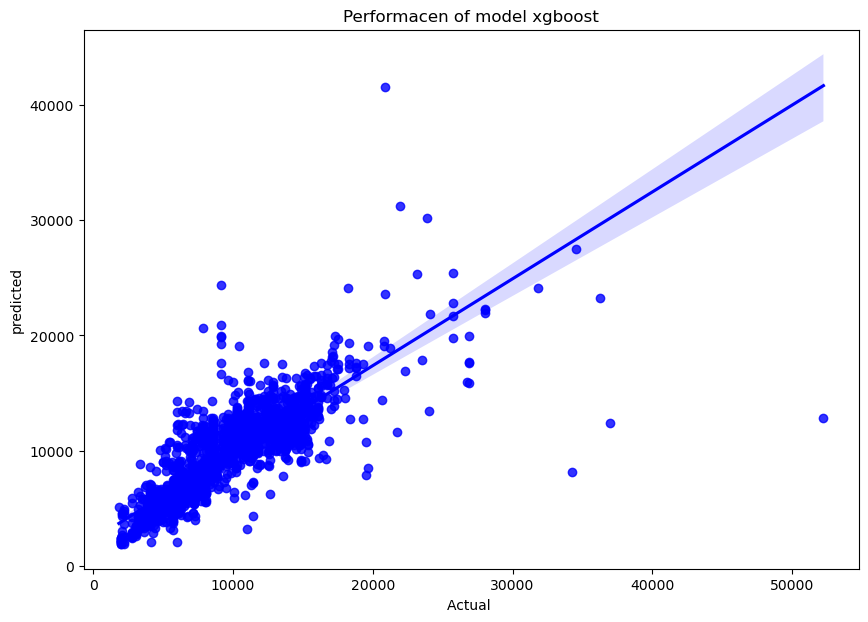

Model  Gradiant Boost
Fit the model
Prediction
Evulation
Train Cross validation
Test Cross validation


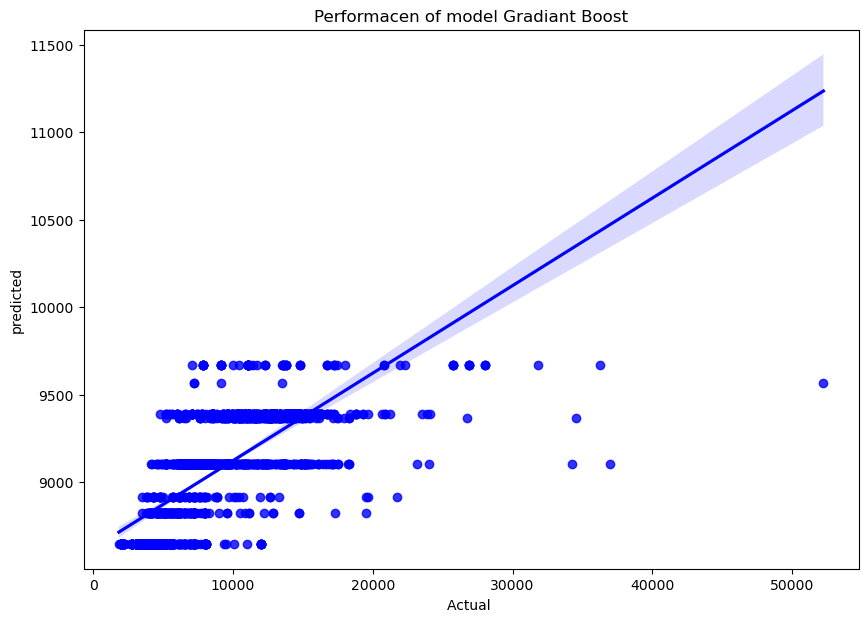

In [629]:
results={
    "model":[],
    "r2_score":[],
    "mean_squared_error":[],
    "mean_absolute_error":[],
    "adjusted":[],
    "train score":[],
    "test_score":[],
}

for model_name,model in models.items():  
    print("Model ",model_name)
    
    final=Pipeline(steps=[
    ("Process",trasform),
    ("model",model)
    ])
    
    print("Fit the model")
    final.fit(x_train,y_train)
    
    # prediction
    print("Prediction")
    y_pred=final.predict(x_test)
    
    # Evulation
    print("Evulation")
    r2=r2_score(y_test,y_pred)
    results["r2_score"].append(r2)
    results["mean_squared_error"].append(mean_squared_error(y_test,y_pred))
    results["mean_absolute_error"].append(mean_absolute_error(y_test,y_pred))
    adjust=1 - ((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1)
    
    results["adjusted"].append(adjust)
    
    # Train score
    print("Train Cross validation")
    train_score=np.round(cross_val_score(final,x_train,y_train,cv=5,scoring='r2').mean(),3)
    
    # test score
    print("Test Cross validation")
    test_score=np.round(cross_val_score(final,x_test,y_test,cv=5,scoring='r2').mean(),3)
    
    results['model'].append(model_name)
    
    results['train score'].append(train_score)
    
    results['test_score'].append(test_score)
    
    # Visulize the result
    plt.figure(figsize=(10,7))
    plt.title(f"Performacen of model {model_name}")
    sns.regplot(x=y_test,y=y_pred,color='blue')
    plt.xlabel("Actual ")
    plt.ylabel("predicted")
    plt.show()

In [630]:
pd.DataFrame(results)

,model,r2_score,mean_squared_error,mean_absolute_error,adjusted,train score,test_score
0,LinearRegression,0.580384,8.711785e+06,1996.790516,0.579843,0.592,0.571
1,Ridge,0.580384,8.711785e+06,1996.789890,0.579843,0.592,0.571
2,Lasso,0.580384,8.711787e+06,1996.787897,0.579843,0.592,0.571
3,RandomForest,0.672853,6.792015e+06,1460.837100,0.672431,0.674,0.590
4,AdaBoost,0.492835,1.052943e+07,2246.266003,0.492181,0.489,0.371
5,xgboost,0.708045,6.061372e+06,1436.222706,0.707669,0.708,0.577
6,Gradiant Boost,0.095307,1.878263e+07,3429.406121,0.094140,0.094,0.088


# Conclussion
- we can see the `xgboost` and `RandomForest` give best result so we can select these and perform hyperparameter tunning in Mlops way.